In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora, models
import pandas as pd
from nltk import FreqDist
import re
impo[InternetShortcut]
URL=http://localhost:8889/notebooks/LDA%20Model.ipynb#
rt spacy
import numpy as np
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
nltk.download('stopwords')
 # one time run

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#!python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()

In [5]:
df = pd.read_csv(r"C:\Users\banva\Desktop\Capstone\cat_data.csv")

In [6]:
df.head(10)

,Unnamed: 0,sku,model,description,brand,weburl,text,caption,rootcategory,category,...,reviewdate,stars,retail,sku_number,brand_binary,SBDsum,model_cate,max_mc,product,m_cate
0,1,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,I like my Ryobi tools. I specially like that I...,I like my Ryobi tools. I specially like that I...,Tools,Power Tool Batteries,...,2019-02-05,4,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
1,2,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Batteries charged quickly and have held their ...,Batteries charged quickly and have held their ...,Tools,Power Tool Batteries,...,2019-02-05,4,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
2,3,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Super,Super ...,Tools,Power Tool Batteries,...,2019-02-05,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
3,4,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Nice kit. Long lasting charge.,Nice kit. Long lasting charge....,Tools,Power Tool Batteries,...,2019-02-05,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
4,5,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,10x\u2019s better than the old batteries,10x\u2019s better than the old batteries ...,Tools,Power Tool Batteries,...,2019-02-05,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
5,6,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Ryobi best battery tools on the market,Ryobi best battery tools on the market...,Tools,Power Tool Batteries,...,2019-02-05,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
6,7,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,The batteries are budget friendly and perform ...,The batteries are budget friendly and perform ...,Tools,Power Tool Batteries,...,2019-02-06,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
7,8,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Works good with my older Ryobi tools.,Works good with my older Ryobi tools....,Tools,Power Tool Batteries,...,2019-02-12,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
8,9,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,"Batteries are nice, a lot bigger than the batt...","Batteries are nice, a lot bigger than the batt...",Tools,Power Tool Batteries,...,2019-02-26,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries
9,10,308056104,P166,RYOBI 18-Volt ONE+ LITHIUM+ HP 3.0 Ah Battery ...,Ryobi,https://www.homedepot.com/p/RYOBI-18-Volt-ONE-...,Very useful tool in the wood shop. Use it more...,Very useful tool in the wood shop. Use it more...,Tools,Power Tool Batteries,...,2019-02-05,5,homedepot,1732,0,4990,1732,1732,P166 Ryobi,Power Tool Batteries


In [7]:
df['text']
df['text'].isnull().sum()

#remove null values
df = df[df['text'].notnull()]

In [8]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [9]:
stop_words = stopwords.words('english')

In [10]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [11]:
# remove unwanted characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

In [12]:
# remove short words (length < 4)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

In [13]:
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

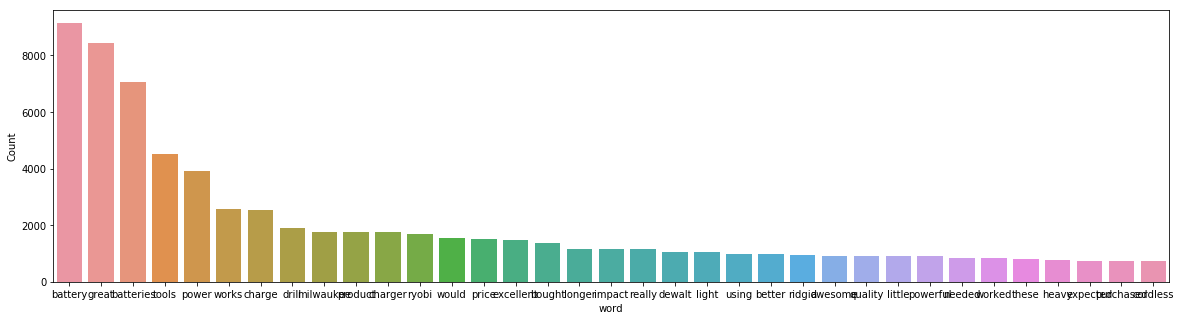

In [53]:
freq_words(reviews, 35)

In [14]:
# lemmatization

import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])


def lemmatization(texts, tags=[ 'NOUN']): # use verbs, adjectives and nouns 
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

# delete most common words, such as relating the to product's name
def delete_product_name(token_list):
    return [x for x in token_list if x not in ['kindle','fire','amazon', 'device', 'tablet', 'book', 'thing']]
tokenized_reviews = tokenized_reviews.apply(delete_product_name)

reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

['batteries', 'charged', 'quickly', 'charge', 'lightly', 'though']
[['tool', 'tool', 'store', 'mower', 'battery', 'other', 'need', 'mater', 'battery', 'battery', 'mower', 'dollar', 'mower'], ['battery'], [], ['charge'], ['battery'], ['battery', 'tool', 'market'], ['battery', 'budget', 'dewalt', 'battery'], ['tool'], ['battery', 'battery', 'impact', 'drill', 'check', 'battery', 'charge'], ['speed', 'velocity'], ['force', 'area'], ['tool', 'grass', 'removal', 'patio', 'length', 'rubber', 'extension', 'store', 'slide', 'rubber', 'water', 'voila', 'extension'], ['power', 'design', 'garage'], [], ['amount', 'movement'], ['detail'], ['performance', 'project'], ['return', 'blade', 'work'], ['star', 'thought', 'process', 'tool'], ['battery', 'drill'], [], ['house'], ['blade', 'flashing'], ['battery', 'tool', 'project', 'extension'], ['lightweight', 'dificult', 'material'], ['item', 'promotion', 'course', 'tool'], ['attachment'], ['product', 'blade', 'place'], ['year', 'saver', 'drywall', 'inst

In [15]:
[x for x in reviews_2 if x not in stop_words]

[['tool',
  'tool',
  'store',
  'mower',
  'battery',
  'other',
  'need',
  'mater',
  'battery',
  'battery',
  'mower',
  'dollar',
  'mower'],
 ['battery'],
 [],
 ['charge'],
 ['battery'],
 ['battery', 'tool', 'market'],
 ['battery', 'budget', 'dewalt', 'battery'],
 ['tool'],
 ['battery', 'battery', 'impact', 'drill', 'check', 'battery', 'charge'],
 ['speed', 'velocity'],
 ['force', 'area'],
 ['tool',
  'grass',
  'removal',
  'patio',
  'length',
  'rubber',
  'extension',
  'store',
  'slide',
  'rubber',
  'water',
  'voila',
  'extension'],
 ['power', 'design', 'garage'],
 [],
 ['amount', 'movement'],
 ['detail'],
 ['performance', 'project'],
 ['return', 'blade', 'work'],
 ['star', 'thought', 'process', 'tool'],
 ['battery', 'drill'],
 [],
 ['house'],
 ['blade', 'flashing'],
 ['battery', 'tool', 'project', 'extension'],
 ['lightweight', 'dificult', 'material'],
 ['item', 'promotion', 'course', 'tool'],
 ['attachment'],
 ['product', 'blade', 'place'],
 ['year', 'saver', 'drywal

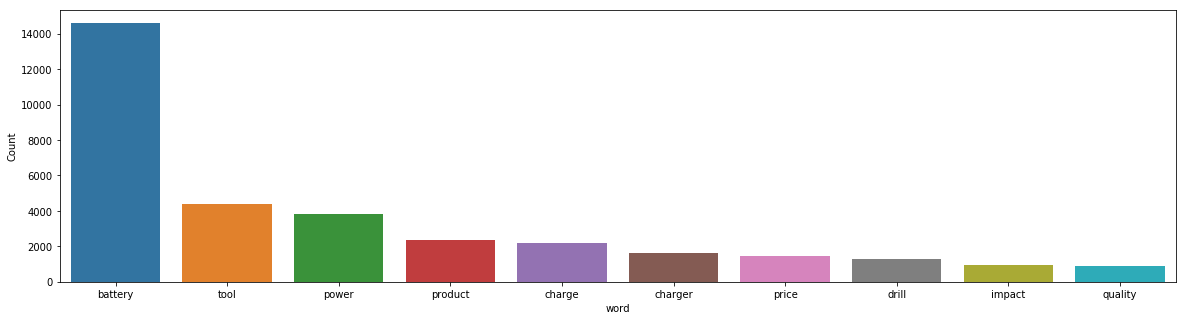

In [16]:
# replace review column with the cleaned version
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

# Visualize
freq_words(df['reviews'], 10)

### Modelling

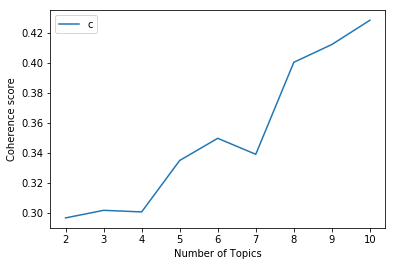

In [17]:
from gensim.models.coherencemodel import CoherenceModel
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# check coherence score to decide number of topics 
c_v_score = []
for i in range(2,11):
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = i, random_state = 44,
                chunksize = 1000, passes = 50)
    c_v_score.append(CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v').get_coherence())

# plot the score
# plot the coherence score
x = range(2, 11)
plt.plot(x, c_v_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# train the model on optimal number of topics 
lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = c_v_score.index(max(c_v_score))+1, random_state = 44,
                chunksize = 1000, passes = 50)

In [19]:
# get the topics
lda_model.print_topics()

[(0,
  '0.357*"power" + 0.151*"drill" + 0.076*"driver" + 0.064*"impact" + 0.040*"cordless" + 0.029*"problem" + 0.015*"level" + 0.014*"light" + 0.012*"cooler" + 0.011*"finish"'),
 (1,
  '0.387*"tool" + 0.181*"battery" + 0.067*"year" + 0.027*"grinder" + 0.023*"impact" + 0.020*"system" + 0.011*"runtime" + 0.010*"performance" + 0.009*"thing" + 0.009*"contractor"'),
 (2,
  '0.401*"product" + 0.037*"expectation" + 0.030*"time" + 0.023*"star" + 0.023*"speed" + 0.021*"house" + 0.019*"version" + 0.017*"design" + 0.015*"trigger" + 0.014*"pressure"'),
 (3,
  '0.396*"price" + 0.058*"thank" + 0.035*"torque" + 0.026*"choice" + 0.026*"place" + 0.022*"meter" + 0.020*"ability" + 0.018*"diyer" + 0.014*"investment" + 0.012*"drain"'),
 (4,
  '0.509*"battery" + 0.101*"charge" + 0.068*"charger" + 0.024*"ridgid" + 0.019*"dewalt" + 0.016*"warranty" + 0.015*"hour" + 0.014*"makita" + 0.013*"minute" + 0.008*"lifetime"'),
 (5,
  '0.127*"weight" + 0.090*"work" + 0.081*"value" + 0.057*"issue" + 0.042*"review" + 0.0

In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\banva\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.328469 -0.009458       1        1  25.829416
1     -0.260405  0.041602       2        1  13.814751
0      0.120593  0.379514       3        1  12.344969
7     -0.249828 -0.054384       4        1   9.623754
8      0.153555 -0.038537       5        1   9.205046
2      0.146024 -0.245965       6        1   8.241946
5      0.143186  0.036084       7        1   7.741968
6      0.138801 -0.042445       8        1   7.149121
3      0.136543 -0.066410       9        1   6.049024, topic_info=     Category          Freq         Term         Total  loglift  logprob
0     Default  13947.000000      battery  13947.000000  30.0000  30.0000
7     Default   4322.000000         tool   4322.000000  29.0000  29.0000
30    Default   3561.000000        power   3561.000000  28.0000  28.0000
52    Default   2670.000000      product   2670.000000  27.0000  27.0000
71    Default   1936.000000        price   1936.000000  26.0000  26.0000
13    Default   1504.000000        drill   1504.000000  25.0000  25.0000
8     Default   2100.000000       charge   2100.000000  24.0000  24.0000
194   Default    794.000000       weight    794.000000  23.0000  23.0000
195   Default    845.000000      quality    845.000000  22.0000  22.0000
64    Default   1419.000000      charger   1419.000000  21.0000  21.0000
72    Default    694.000000        brand    694.000000  20.0000  20.0000
99    Default    762.000000       driver    762.000000  19.0000  19.0000
56    Default    753.000000         year    753.000000  18.0000  18.0000
38    Default    563.000000         work    563.000000  17.0000  17.0000
14    Default    902.000000       impact    902.000000  16.0000  16.0000
276   Default    507.000000        value    507.000000  15.0000  15.0000
109   Default    543.000000  replacement    543.000000  14.0000  14.0000
35    Default    542.000000      project    542.000000  13.0000  13.0000
142   Default    434.000000        money    434.000000  12.0000  12.0000
69    Default    554.000000        light    554.000000  11.0000  11.0000
94    Default    397.000000       blower    397.000000  10.0000  10.0000
192   Default    360.000000        issue    360.000000   9.0000   9.0000
86    Default    479.000000     purchase    479.000000   8.0000   8.0000
129   Default    369.000000      trimmer    369.000000   7.0000   7.0000
67    Default    359.000000     capacity    359.000000   6.0000   6.0000
162   Default    402.000000     cordless    402.000000   5.0000   5.0000
112   Default    440.000000        month    440.000000   4.0000   4.0000
114   Default    286.000000        thank    286.000000   3.0000   3.0000
918   Default    335.000000       octane    335.000000   2.0000   2.0000
100   Default    311.000000      package    311.000000   1.0000   1.0000
...       ...           ...          ...           ...      ...      ...
894    Topic9    169.987518       torque    170.861450   2.8001  -3.3585
300    Topic9    126.891769       choice    127.765755   2.7984  -3.6509
51     Topic9    126.062401        place    126.936516   2.7984  -3.6574
303    Topic9    106.824577        meter    107.698715   2.7971  -3.8230
224    Topic9     98.529015      ability     99.403038   2.7964  -3.9039
541    Topic9     87.854416        diyer     88.728554   2.7954  -4.0185
893    Topic9     70.670494   investment     71.544418   2.7930  -4.2362
858    Topic9     60.584534        drain     61.458599   2.7909  -4.3902
1418   Topic9     60.068760      brainer     60.942844   2.7908  -4.3987
21     Topic9     53.810242       length     54.684219   2.7892  -4.5088
517    Topic9     51.759342        photo     52.634773   2.7885  -4.5476
238    Topic9     48.711521       result     49.585602   2.7875  -4.6083
539    Topic9     42.581848  convenience     43.455879   2.7850  -4.7428
45     Topic9     40.822117  lightweight     41.696072   2.7841  -4.7850
1644 